# **Import Library:** 분석에 사용할 모듈 설치

[![Open in Colab](http://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thekimk/All-About-Deep-Learning/blob/main/Practice4-3_DeepLearning_CNNArchitectures_KK(Practice).ipynb)

In [1]:
# !pip install --upgrade pip
# !python -m pip install --user --upgrade pip

In [2]:
# # Tensorflow 및 Keras 설치하기
# !pip install tensorflow==2.10.*
# # !pip install --upgrade --user tensorflow
# !pip install -U tensorflow-addons
# !pip install keras
# # !pip install --upgrade --user keras
# !pip install keras-tqdm

In [3]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
tf.get_logger().warning('test')
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Dropout, Reshape
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import plot_model

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Evaluation metrics
from sklearn import metrics
# for regression
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error
# for classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [4]:
# 사용자 정의 함수
from module_regression import *
from module_classification import *

# **Problem:** 숫자이미지 분류

## Data Preprocessing

In [5]:
# MNIST(Modified National Institute of Standards and Technology)를 Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [6]:
# 데이터의 갯수와 크기 확인
print('---------------train----------------')
print('X: ', X_train.shape, X_train.min(), X_train.max())
print('Y: ', Y_train.shape)
print('----------------test----------------')
print('X: ', X_test.shape, X_test.min(), X_test.max())
print('Y: ', Y_test.shape)

---------------train----------------
X:  (60000, 28, 28) 0 255
Y:  (60000,)
----------------test----------------
X:  (10000, 28, 28) 0 255
Y:  (10000,)


In [7]:
# 샘플 데이터 출력
# 0에서 255 사이의 값을 가진 데이터
for i in range(X_train[0].shape[0]):
    for j in range(X_train[0].shape[1]):
        print('{:4d}'.format(X_train[0][i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

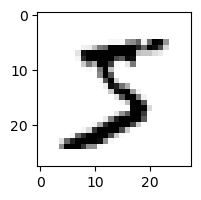

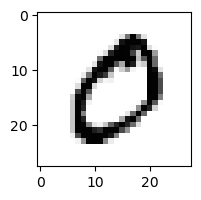

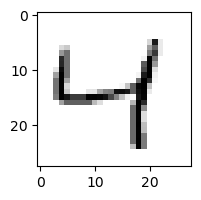

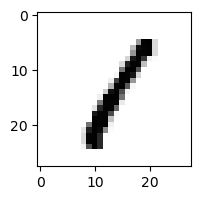

Label of train:  [5 0 4 1]


In [8]:
# 샘플 데이터 시각화
# 0에서 255 사이의 값을 가진 데이터 시각화
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i], cmap='Greys')
    plt.show()

print('Label of train: ', Y_train[:4])

In [9]:
# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0


In [10]:
# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

X_train: (60000, 784) Y_train: (60000,)
X_test: (10000, 784) Y_test: (10000,)


## MLP

In [11]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
LOSS = 'sparse_categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 1

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


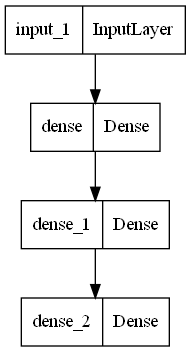

In [12]:
# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

Epoch 1/5
750/750 [==============================] - 5s 3ms/step - loss: 0.2574 - accuracy: 0.9237 - val_loss: 0.1283 - val_accuracy: 0.9638
Epoch 2/5
750/750 [==============================] - 3s 3ms/step - loss: 0.1035 - accuracy: 0.9688 - val_loss: 0.1078 - val_accuracy: 0.9667
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0677 - accuracy: 0.9787 - val_loss: 0.0995 - val_accuracy: 0.9697
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0493 - accuracy: 0.9845 - val_loss: 0.0851 - val_accuracy: 0.9761
Epoch 5/5
750/750 [==============================] - 3s 3ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 0.1017 - val_accuracy: 0.9707


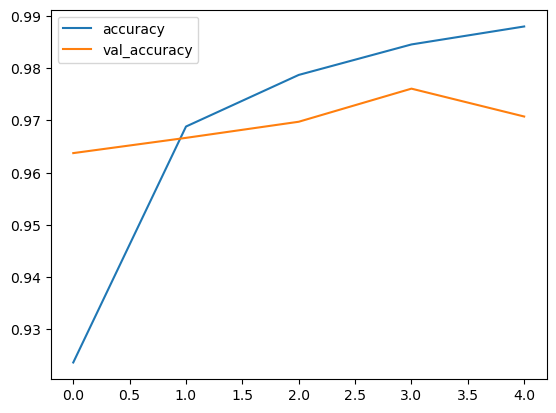

In [13]:
# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

### Prediction and Evaluation

In [14]:
# Train 데이터 예측하기
Y_trpred = model.predict(X_train)
print(Y_trpred, '\n\n', np.argmax(Y_trpred, axis=1))

1875/1875 [==============================] - 3s 1ms/step
[[1.1138607e-12 1.1823767e-08 8.6556795e-10 ... 4.2365656e-11
  7.2415976e-11 1.5762963e-07]
 [9.9997199e-01 1.6469074e-09 2.7640128e-05 ... 6.9051791e-09
  9.7836432e-09 4.1704130e-08]
 [1.2652297e-08 1.7351751e-05 7.0331885e-06 ... 7.7732047e-06
  9.1991615e-07 1.3157602e-04]
 ...
 [6.0115243e-14 1.2265398e-10 4.4074485e-13 ... 4.3660882e-14
  1.0244671e-09 8.1754052e-09]
 [5.7737880e-06 7.8159997e-07 3.0793639e-05 ... 9.6395638e-08
  7.6434151e-07 1.2985213e-07]
 [1.5066879e-06 2.9650043e-06 4.0077179e-05 ... 7.9022448e-06
  9.9990165e-01 1.0005229e-05]] 

 [5 0 4 ... 5 6 8]


In [15]:
# Test 데이터 예측하기
Y_tepred = model.predict(X_test)
print(Y_tepred, '\n\n', np.argmax(Y_tepred, axis=1))

313/313 [==============================] - 1s 2ms/step
[[9.26829529e-08 1.57758279e-07 2.16708831e-05 ... 9.99936104e-01
  3.44533674e-07 1.65813726e-05]
 [1.63716513e-10 1.98924135e-06 9.99997973e-01 ... 1.78130601e-11
  3.45735685e-09 1.82777216e-15]
 [3.80519282e-07 9.99936819e-01 7.66136395e-07 ... 2.30903188e-05
  1.00173729e-05 5.90993956e-08]
 ...
 [8.08137758e-12 1.01648521e-08 3.60358271e-11 ... 2.45389174e-07
  3.77662360e-07 3.22351497e-08]
 [1.64555802e-09 1.03200595e-08 1.75921257e-11 ... 9.22692062e-11
  1.60629443e-05 3.07238318e-10]
 [4.02529399e-10 3.88760066e-11 5.41746772e-08 ... 1.53392750e-12
  8.04092348e-10 5.31772737e-10]] 

 [7 2 1 ... 4 5 6]


In [16]:
# Train 예측 성능 평가하기
# 학습과정의 결과와 유사
model.evaluate(X_train, Y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0463 - accuracy: 0.9859


[0.046277109533548355, 0.9858999848365784]

In [17]:
# Train 예측 성능 평가하기
# 학습과정의 결과와 유사
pd.crosstab(Y_train, np.argmax(model.predict(X_train), axis=1),
            rownames=['True'], colnames=['Pred'])

,Pred 0,Pred 1,Pred 2,Pred 3,Pred 4,Pred 5,Pred 6,Pred 7,Pred 8,Pred 9
True 0,5847,1,38,0,1,5,6,0,24,1
True 1,0,6715,2,2,4,4,2,2,11,0
True 2,1,8,5930,0,1,1,1,3,13,0
True 3,0,2,35,5921,1,65,0,11,90,6
True 4,1,5,13,0,5795,5,2,7,6,8
True 5,2,0,4,7,3,5380,9,0,12,4
True 6,4,5,6,0,5,23,5853,0,22,0
True 7,3,32,43,1,4,11,0,6155,7,9
True 8,4,6,18,2,0,15,5,2,5798,1
True 9,8,7,9,7,59,20,0,26,53,5760


In [18]:
# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0841 - accuracy: 0.9745


[0.08412338048219681, 0.9745000004768372]

In [19]:
# Test 예측 성능 평가하기
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

,Pred 0,Pred 1,Pred 2,Pred 3,Pred 4,Pred 5,Pred 6,Pred 7,Pred 8,Pred 9
True 0,965,1,7,0,0,2,2,0,2,1
True 1,0,1125,2,0,0,1,2,0,5,0
True 2,0,0,1019,1,2,1,0,3,6,0
True 3,1,0,6,969,0,13,0,6,11,4
True 4,1,2,5,0,958,5,3,1,2,5
True 5,1,0,0,3,1,878,3,1,4,1
True 6,5,3,2,0,5,11,929,0,3,0
True 7,2,6,16,1,1,1,0,993,4,4
True 8,3,0,4,2,5,8,3,1,947,1
True 9,3,4,1,2,15,9,0,3,10,962


In [20]:
# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_train.shape[0])
print('목표값: ', Y_train[idx_rand])
print('예측값: ', np.argmax(model.predict(X_train[idx_rand][np.newaxis,:])))

1/1 [==============================] - 0s 25ms/step
예측값:  5
목표값:  5


### Summary

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 784) Y_train: (60000,)
X_test: (10000, 784) Y_test: (10000,)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
750/750 [==========

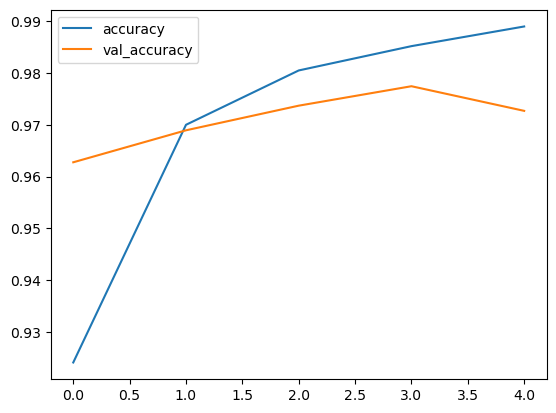

313/313 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9752

Test Confusion Maxtrix: 
313/313 [==============================] - 0s 1ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,964,1,3,1,1,2,3,1,3,1
1,0,1125,3,0,0,1,2,0,4,0
2,2,0,1018,0,2,0,2,5,3,0
3,0,0,8,962,0,26,0,4,6,4
4,1,1,0,1,968,0,6,1,1,3
5,2,0,0,2,2,876,6,1,1,2
6,2,2,1,0,6,9,935,0,3,0
7,1,3,15,1,4,0,0,993,2,9
8,0,0,4,3,5,3,4,2,950,3


In [21]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
LOSS = 'sparse_categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 1

# Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN

### Convolution and Pooling

- **Convolution**

In [22]:
# 임의 데이터 생성
X = tf.random.normal(shape=(128,28,28,1), mean=0., stddev=1.) # [batch size, W, H, channel]
X.shape

TensorShape([128, 28, 28, 1])

In [23]:
# 합성곱을 통과한 데이터
hiddens = Conv2D(filters=32, kernel_size=(3,3), activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 26, 26, 32)


In [24]:
# STRIDE 이동을 빠르게 할 경우의 데이터
hiddens = Conv2D(filters=32, kernel_size=(3,3), strides=2, activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 13, 13, 32)


In [25]:
# 입력과 출력의 크기가 같은 데이터
hiddens = Conv2D(filters=32, kernel_size=(3,3), strides=2, padding='same', activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 14, 14, 32)


- **Pooling**

In [26]:
# 임의 데이터 생성
X = tf.random.normal(shape=(128,28,28,1), mean=0., stddev=1.) # [batch size, W, H, channel]
hiddens = Conv2D(filters=32, kernel_size=(3,3), strides=2, padding='same', activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 14, 14, 32)


In [27]:
# Max Pooling 이후의 데이터
hiddens_pool = MaxPooling2D(pool_size=(2,2), strides=(2,2))(hiddens)
print('After Pooling: ', hiddens_pool.shape)

After Pooling:  (128, 7, 7, 32)


In [28]:
# Max Pooling 이후의 데이터
hiddens_pool = MaxPooling2D(pool_size=(4,4), strides=(4,4))(hiddens)
print('After Pooling: ', hiddens_pool.shape)

After Pooling:  (128, 3, 3, 32)


In [29]:
# Max Pooling 이후의 데이터
hiddens_pool = MaxPooling2D(pool_size=(4,4), strides=(4,4), padding='same')(hiddens)
print('After Pooling: ', hiddens_pool.shape)

After Pooling:  (128, 4, 4, 32)


### Summary

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000,)
X_test: (10000, 28, 28, 1) Y_test: (10000,)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 10)                250890    
                       

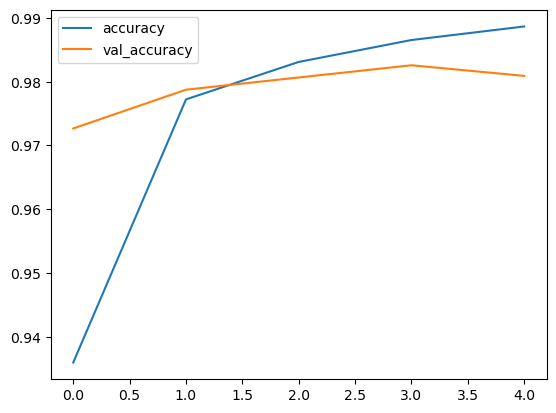

313/313 [==============================] - 1s 3ms/step - loss: 0.0587 - accuracy: 0.9814

Test Confusion Maxtrix: 
313/313 [==============================] - 0s 1ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,971,0,2,1,0,1,2,0,3,0
1,0,1125,4,1,2,0,1,0,2,0
2,2,1,1020,0,1,0,0,5,2,1
3,0,0,6,985,0,13,0,1,5,0
4,0,1,1,0,973,0,0,0,1,6
5,2,0,1,4,0,883,2,0,0,0
6,6,2,2,0,3,4,939,0,2,0
7,0,2,20,2,2,0,0,991,8,3
8,5,0,7,0,2,3,1,2,951,3


In [30]:
# 하이퍼파라미터


# Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링


# Reshape


# 네트워크 구축


# 데이터 학습하기


# Train 예측 성능 평가하기


# Test 예측 성능 평가하기



## CNN with Tuning

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000,)
X_test: (10000, 28, 28, 1) Y_test: (10000,)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        73792     
                       

Training:   0%|                                                                                               …

Epoch 1/5
750/750 [==============================] - 5s 6ms/step - loss: 0.3580 - accuracy: 0.8849 - val_loss: 0.0695 - val_accuracy: 0.9800
Epoch 2/5
750/750 [==============================] - 4s 6ms/step - loss: 0.1272 - accuracy: 0.9619 - val_loss: 0.0452 - val_accuracy: 0.9864
Epoch 3/5
750/750 [==============================] - 5s 6ms/step - loss: 0.0972 - accuracy: 0.9709 - val_loss: 0.0417 - val_accuracy: 0.9877
Epoch 4/5
750/750 [==============================] - 4s 6ms/step - loss: 0.0812 - accuracy: 0.9759 - val_loss: 0.0391 - val_accuracy: 0.9885
Epoch 5/5
750/750 [==============================] - 4s 6ms/step - loss: 0.0708 - accuracy: 0.9780 - val_loss: 0.0406 - val_accuracy: 0.9877


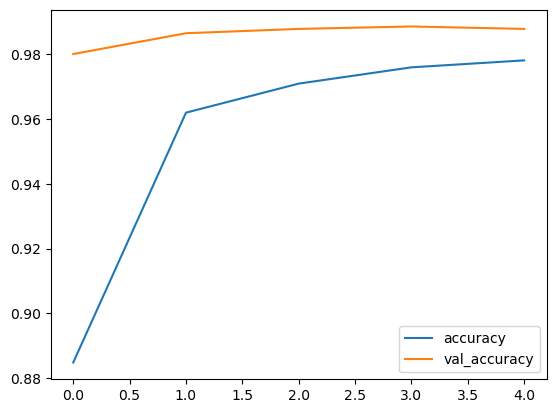

313/313 [==============================] - 1s 4ms/step - loss: 0.0335 - accuracy: 0.9882

Test Confusion Maxtrix: 
313/313 [==============================] - 1s 2ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,977,0,0,0,0,0,1,0,1,1
1,0,1126,2,3,0,0,1,0,3,0
2,1,0,1028,0,1,0,0,2,0,0
3,0,0,5,1001,0,2,0,0,1,1
4,0,0,2,0,970,0,1,1,1,7
5,2,0,0,5,0,881,1,1,1,1
6,3,2,1,0,3,4,944,0,1,0
7,0,2,11,0,0,0,0,1009,1,5
8,6,1,1,1,1,0,0,4,955,5


In [31]:
# 하이퍼파라미터


# Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_train.shape[2], 1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
 

# 데이터 학습하기


# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

In [32]:
# 베스트 모델 로딩


# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

313/313 [==============================] - 1s 3ms/step - loss: 0.0337 - accuracy: 0.9889

Test Confusion Maxtrix: 
313/313 [==============================] - 1s 2ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,975,0,1,1,0,0,2,0,1,0
1,0,1130,2,2,0,0,0,0,1,0
2,3,0,1024,1,0,0,1,3,0,0
3,0,0,2,1005,0,2,0,0,1,0
4,0,0,1,0,968,0,1,0,2,10
5,0,0,0,8,0,881,2,0,1,0
6,3,2,0,0,2,4,945,0,2,0
7,0,2,11,1,0,0,0,1011,1,2
8,1,0,0,2,1,1,0,3,965,1


목표값: 


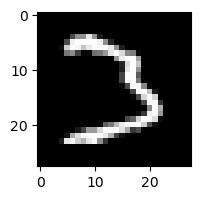

1/1 [==============================] - 0s 71ms/step
예측값:  3


In [33]:
# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()


# **Problem:** 패션이미지 분류

## Data Preprocessing

In [34]:
# Train, Test 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [35]:
# 데이터의 갯수와 크기 확인
print('---------------train----------------')
print('X: ', X_train.shape, X_train.min(), X_train.max())
print('Y: ', Y_train.shape)
print('----------------test----------------')
print('X: ', X_test.shape, X_test.min(), X_test.max())
print('Y: ', Y_test.shape)

---------------train----------------
X:  (60000, 28, 28) 0 255
Y:  (60000,)
----------------test----------------
X:  (10000, 28, 28) 0 255
Y:  (10000,)


In [36]:
# 샘플 데이터 출력
# 0에서 255 사이의 값을 가진 데이터
for i in range(X_train[0].shape[0]):
    for j in range(X_train[0].shape[1]):
        print('{:4d}'.format(X_train[0][i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0
   0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3
   0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15
   0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66
   0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 215 213 164 127

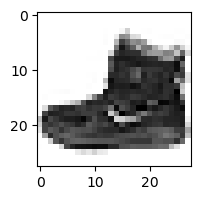

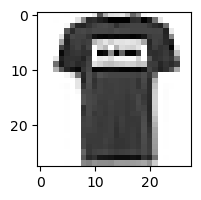

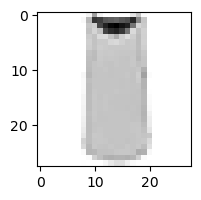

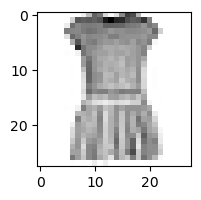

Label of train:  ['Ankle Boot', 'T-shirt', 'T-shirt', 'Dress']


In [37]:
# 샘플 데이터 시각화
# 0에서 255 사이의 값을 가진 데이터 시각화
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i], cmap='Greys')
    plt.show()

Y_label_list = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
print('Label of train: ', [Y_label_list[num] for num in Y_train[:4]])

## `categorical_crossentropy?`

> **"일반적으로 다중 클래스/라벨 분류시, `categorical_crossentropy` 또는 `sparse_categorical_crossentropy`를 사용할 수 있음"**

In [ ]:
# sparse_categorical_crossentropy 사용시 입출력
Y_true = [1, 2]
Y_pred = [[0, 0.9, 0.1], [0.6, 0.8, 0.1]]
loss = keras.metrics.sparse_categorical_crossentropy(Y_true, Y_pred)
loss.shape

```python
# 입력을 One-hot Encoding 방식으로 받을 시 출력
Y_true = [[0,1,0], [1,0,1]]
Y_pred = [[0, 0.9, 0.1], [0.6, 0.8, 0.1]]
loss = keras.metrics.sparse_categorical_crossentropy(Y_true, Y_pred)
loss.shape

# 출력 메시지
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
~\AppData\Local\Temp\ipykernel_22364\934507019.py in <module>
      1 Y_true = [[0,1,0], [1,0,1]]
      2 Y_pred = [[0, 0.9, 0.1], [0.7, 0.8, 0.1]]
----> 3 loss = keras.metrics.sparse_categorical_crossentropy(Y_true, Y_pred)
      4 loss.shape

~\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\traceback_utils.py in error_handler(*args, **kwargs)
    151     except Exception as e:
    152       filtered_tb = _process_traceback_frames(e.__traceback__)
--> 153       raise e.with_traceback(filtered_tb) from None
    154     finally:
    155       del filtered_tb

~\anaconda3\lib\site-packages\keras\losses.py in sparse_categorical_crossentropy(y_true, y_pred, from_logits, axis, ignore_class)
   2082       Sparse categorical crossentropy loss value.
   2083     """
-> 2084     return backend.sparse_categorical_crossentropy(
   2085         y_true,
   2086         y_pred,

~\anaconda3\lib\site-packages\keras\backend.py in sparse_categorical_crossentropy(target, output, from_logits, axis, ignore_class)
   5632             )
   5633     else:
-> 5634         res = tf.nn.sparse_softmax_cross_entropy_with_logits(
   5635             labels=target, logits=output
   5636         )

ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(6,) and logits.shape=(2, 3)
```

---

## `One-hot Encoding?`

**1) Binning(구간화):** `연속형 변수를 범주형` 변수로 변환

- 숫자로 구성된 `연속형 값이 넓을 경우` 그룹을 지어 이해도를 높임
- 변수의 선형적 특성 이외에 `비선형적 특성을 반영`

**2) Label Encoding:** `범주형 변수`의 값들을 `숫자 값(레이블)`로 변경

<center><img src='Image/Advanced/Label_Encoding.png' width='250'></center>

**3) Dummy Variable(가변수, $D_i$)**: `범주형 변수`를 `0 또는 1값`을 가진 `하나 이상의 새로운 변수`로 변경(One-hot Encoding)

- **생성법:** `계절변수`가 봄/여름/가을/겨울 이라는 값을 포함하는 경우, `계절_봄`, `계절_여름`, `계절_가을`, `계절_겨울` 총 4개의 변수를 생성

> (1) 범주형 변수의 `독립 값을 확인` (봄/여름/가을/겨울)
>
> (2) 독립 값의 `갯수만큼 더미변수`를 생성 ($D_1$ = 봄, $D_2$ = 여름, $D_3$ = 가을, $D_3$ = 겨울) 
>> *더미변수의 갯수는 최대 1개까지 줄일 수 있음*
>
> (3) 각 `더미변수들의 값`은 변수의 정의와 `같으면 1`이고 `나머지는 0`으로 채움   

<center><img src='Image/Advanced/Dummy_Engineering.png' width='500'></center>

<!-- <center><img src='Image/Advanced/Dummy-variable-regression.jpg' width='400'></center> -->

In [ ]:
# One-hot Encoding 입력을 처리하기 위해 categorical_crossentropy 사용
Y_true = [[0,1,0], [1,0,1]]
Y_pred = [[0, 0.9, 0.1], [0.6, 0.8, 0.1]]
loss = keras.metrics.categorical_crossentropy(Y_true, Y_pred)
loss.shape

> - 어떤 비용함수를 사용하든 `정확성 성능에는 비영향`이지만, `sparse_categorical_crossentropy`를 사용하면 One-hot Encoding을 사용하지 않기 때문에 `메모리를 적게 사용하는 이점`
>
> | **다중분류 비용함수 종류** | **입력형태** | **출력형태** | **결론** |
|:---:|:---|:---|:---|
| `sparse_categorical_crossentropy` | `[1, 2]` | `[[0, 0.9, 0.1], [0.6, 0.8, 0.1]]` | 입력이 `정수형태` |
| `categorical_crossentropy` | `[[0,1,0], [1,0,1]]` | `[[0, 0.9, 0.1], [0.6, 0.8, 0.1]]` | 입력치 `One-hot 벡터형태` |

## MLP

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 784) Y_train: (60000,)
X_test: (10000, 784) Y_test: (10000,)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
750/750 [=========

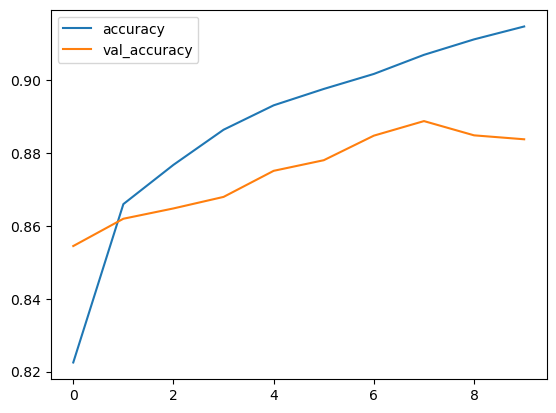

313/313 [==============================] - 1s 2ms/step - loss: 0.3618 - accuracy: 0.8771

Test Confusion Maxtrix: 
313/313 [==============================] - 0s 1ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,829,4,17,52,5,0,85,0,8,0
1,1,972,1,20,4,0,2,0,0,0
2,14,1,702,31,196,0,55,0,1,0
3,8,9,3,934,26,0,16,0,4,0
4,1,0,45,37,875,0,37,0,5,0
5,0,0,0,1,0,975,0,11,1,12
6,124,3,74,53,99,0,641,0,6,0
7,0,0,0,0,0,42,0,943,1,14
8,7,0,3,7,4,3,5,2,969,0


In [38]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 10
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Fashion_MNIST_MLP.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000,)
X_test: (10000, 28, 28, 1) Y_test: (10000,)
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        73792     
                       

Training:   0%|                                                                                               …

Epoch 1/10
750/750 [==============================] - 5s 6ms/step - loss: 0.6702 - accuracy: 0.7563 - val_loss: 0.3692 - val_accuracy: 0.8677
Epoch 2/10
750/750 [==============================] - 4s 6ms/step - loss: 0.4304 - accuracy: 0.8438 - val_loss: 0.3278 - val_accuracy: 0.8812
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3784 - accuracy: 0.8633 - val_loss: 0.2996 - val_accuracy: 0.8902
Epoch 4/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3483 - accuracy: 0.8737 - val_loss: 0.2837 - val_accuracy: 0.8924
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3262 - accuracy: 0.8828 - val_loss: 0.2682 - val_accuracy: 0.9004
Epoch 6/10
750/750 [==============================] - 4s 6ms/step - loss: 0.3055 - accuracy: 0.8901 - val_loss: 0.2465 - val_accuracy: 0.9076
Epoch 7/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2946 - accuracy: 0.8908 - val_loss: 0.2456 - val_accuracy: 0.9074
Epoch 

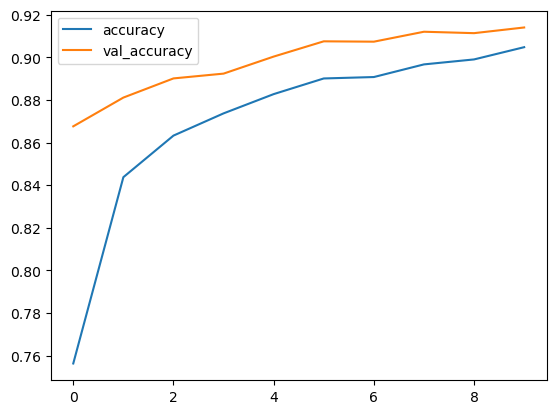

313/313 [==============================] - 1s 3ms/step - loss: 0.2528 - accuracy: 0.9092

Test Confusion Maxtrix: 
313/313 [==============================] - 1s 2ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,876,0,20,18,5,1,76,0,4,0
1,0,984,1,10,3,0,1,0,1,0
2,14,1,887,6,47,0,45,0,0,0
3,15,2,13,910,25,0,34,0,1,0
4,1,0,72,21,846,0,60,0,0,0
5,0,0,0,0,0,980,0,15,0,5
6,116,2,81,23,67,0,705,0,6,0
7,0,0,0,0,0,4,0,988,0,8
8,3,0,5,0,5,1,2,3,980,1


In [39]:
# 하이퍼파라미터


# Train, Test로 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape


# 네트워크 구축


# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

목표값: 


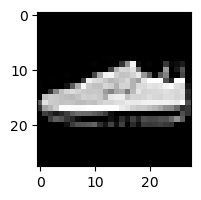

1/1 [==============================] - 0s 49ms/step
예측값:  Sneaker


In [40]:
# 베스트 모델 로딩


# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']


## ResNet50

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000,)
X_test: (10000, 28, 28, 1) Y_test: (10000,)
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 34, 34, 1)    0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 14, 14, 64)   3200        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormal

                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 7, 7, 64)     36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 7, 7, 64)    256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 7, 7, 64)    0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 7, 7, 256)    16640       ['conv2_block3_2_relu[0][0]']    
          

                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 4, 4, 128)    147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 4, 4, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 4, 4, 512)    66048       ['conv3_block3_2_relu[0][0]']    
          

                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 2, 2, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 2, 2, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
          

                                                                                                  
 conv4_block5_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 2, 2, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 2, 2, 1024)   0           ['conv4_block4_out[0][0]',       
          

                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 1, 1, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 1, 1, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 1, 1, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 1, 1, 2048)   0           ['conv5_block1_out[0][0]',       
          

Training:   0%|                                                                                               …

Epoch 1/10
750/750 [==============================] - 34s 39ms/step - loss: 0.6012 - accuracy: 0.7964 - val_loss: 0.4162 - val_accuracy: 0.8531
Epoch 2/10
750/750 [==============================] - 30s 39ms/step - loss: 0.3610 - accuracy: 0.8706 - val_loss: 0.3350 - val_accuracy: 0.8804
Epoch 3/10
750/750 [==============================] - 31s 41ms/step - loss: 0.3100 - accuracy: 0.8854 - val_loss: 0.4255 - val_accuracy: 0.8502
Epoch 4/10
750/750 [==============================] - 31s 41ms/step - loss: 0.2929 - accuracy: 0.8944 - val_loss: 0.3192 - val_accuracy: 0.8848
Epoch 5/10
750/750 [==============================] - 32s 42ms/step - loss: 0.4179 - accuracy: 0.8554 - val_loss: 0.3856 - val_accuracy: 0.8577
Epoch 6/10
750/750 [==============================] - 29s 39ms/step - loss: 0.4082 - accuracy: 0.8572 - val_loss: 1049.4060 - val_accuracy: 0.2788
Epoch 7/10
750/750 [==============================] - 28s 37ms/step - loss: 0.3759 - accuracy: 0.8641 - val_loss: 0.3221 - val_accura

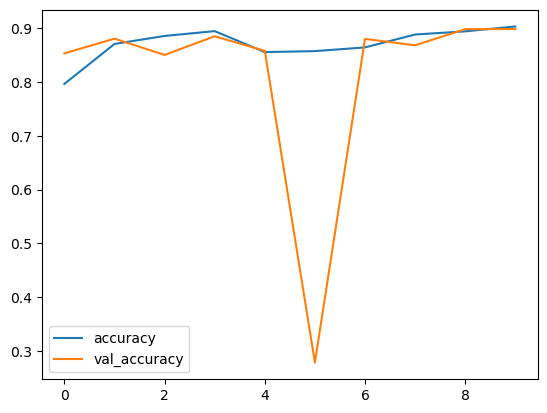

313/313 [==============================] - 4s 11ms/step - loss: 0.2996 - accuracy: 0.8918

Test Confusion Maxtrix: 
313/313 [==============================] - 4s 9ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,831,3,39,29,13,1,81,0,3,0
1,2,984,0,10,3,0,0,0,1,0
2,9,1,779,11,154,0,45,0,1,0
3,9,13,12,876,65,0,22,0,3,0
4,0,1,26,13,910,0,48,0,2,0
5,0,0,0,0,0,965,0,16,2,17
6,118,6,78,31,91,0,666,0,10,0
7,0,0,0,0,0,8,0,982,0,10
8,2,1,5,2,8,1,3,1,977,0


In [41]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 10
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Fashion_MNIST_ResNet50.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_train.shape[2], 1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축


# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

목표값: 


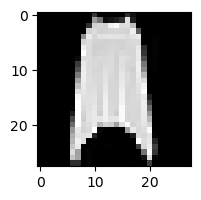

1/1 [==============================] - 1s 961ms/step
예측값:  Pullover


In [42]:
# 베스트 모델 로딩


# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
print('예측값: ', Y_label_list[np.argmax(model.predict(X_test[idx_rand][np.newaxis,:]))])

# **Problem:** 컬러사물이미지 분류

## Data Preprocessing

In [43]:
# Train, Test 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [44]:
# 데이터의 갯수와 크기 확인
print('---------------train----------------')
print('X: ', X_train.shape, X_train.min(), X_train.max())
print('Y: ', Y_train.shape)
print('----------------test----------------')
print('X: ', X_test.shape, X_test.min(), X_test.max())
print('Y: ', Y_test.shape)

---------------train----------------
X:  (50000, 32, 32, 3) 0 255
Y:  (50000, 1)
----------------test----------------
X:  (10000, 32, 32, 3) 0 255
Y:  (10000, 1)


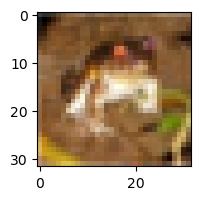

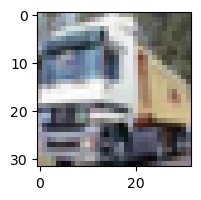

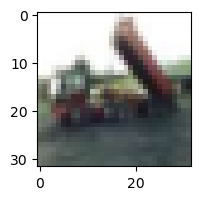

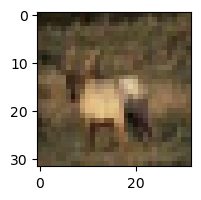

Label of train:  ['Frog', 'Truck', 'Truck', 'Deer']


In [45]:
# 샘플 데이터 시각화
# 0에서 255 사이의 값을 가진 데이터 시각화
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i])
    plt.show()

Y_label_list = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print('Label of train: ', [Y_label_list[num] for num in Y_train.flatten()[:4]])

## MLP

normalized X:  (50000, 32, 32, 3) 0.0 1.0
normalized X:  (10000, 32, 32, 3) 0.0 1.0
X_train: (50000, 3072) Y_train: (50000, 10)
X_test: (10000, 3072) Y_test: (10000, 10)
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_14 (Dense)            (None, 256)               786688    
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                                 
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
625/

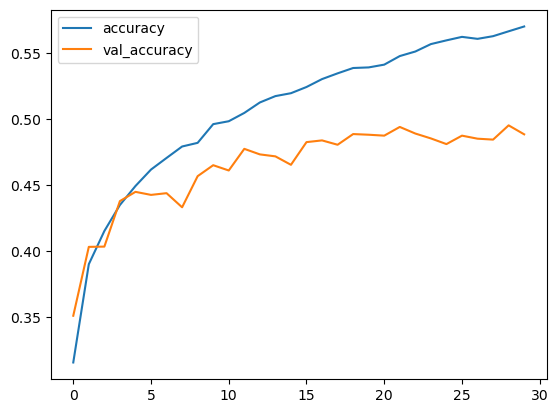

313/313 [==============================] - 1s 3ms/step - loss: 1.4673 - accuracy: 0.4928

Test Confusion Maxtrix: 
313/313 [==============================] - 0s 1ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,546,41,40,28,22,16,23,39,172,73
1,41,599,6,25,10,11,14,29,99,166
2,80,29,255,116,172,100,75,100,42,31
3,37,35,53,401,49,173,84,70,50,48
4,50,6,71,84,442,58,91,132,47,19
5,26,25,50,272,49,329,59,93,63,34
6,15,16,41,132,127,87,498,36,21,27
7,42,29,26,71,61,74,28,560,37,72
8,97,52,7,22,11,15,5,15,704,72


In [46]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 30
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','ColorObject_MNIST_MLP.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN

normalized X:  (50000, 32, 32, 3) 0.0 1.0
normalized X:  (10000, 32, 32, 3) 0.0 1.0
X_train: (50000, 32, 32, 3) Y_train: (50000, 10)
X_test: (10000, 32, 32, 3) Y_test: (10000, 10)
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        73792     
           

Training:   0%|                                                                                               …

Epoch 1/30
625/625 [==============================] - 7s 11ms/step - loss: 1.8065 - accuracy: 0.3349 - val_loss: 1.4921 - val_accuracy: 0.4742
Epoch 2/30
625/625 [==============================] - 7s 11ms/step - loss: 1.4958 - accuracy: 0.4536 - val_loss: 1.2872 - val_accuracy: 0.5497
Epoch 3/30
625/625 [==============================] - 7s 11ms/step - loss: 1.3832 - accuracy: 0.4956 - val_loss: 1.1725 - val_accuracy: 0.5991
Epoch 4/30
625/625 [==============================] - 5s 8ms/step - loss: 1.3101 - accuracy: 0.5199 - val_loss: 1.1157 - val_accuracy: 0.6215
Epoch 5/30
625/625 [==============================] - 6s 9ms/step - loss: 1.2518 - accuracy: 0.5423 - val_loss: 1.0978 - val_accuracy: 0.6198
Epoch 6/30
625/625 [==============================] - 5s 8ms/step - loss: 1.2097 - accuracy: 0.5581 - val_loss: 1.0404 - val_accuracy: 0.6443
Epoch 7/30
625/625 [==============================] - 6s 10ms/step - loss: 1.1788 - accuracy: 0.5720 - val_loss: 1.0238 - val_accuracy: 0.6533
Ep

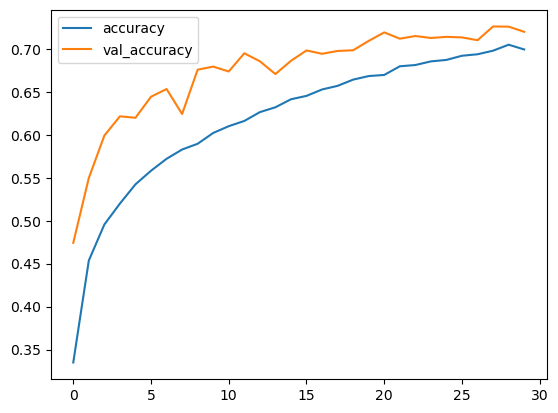

313/313 [==============================] - 1s 3ms/step - loss: 0.8277 - accuracy: 0.7216

Test Confusion Maxtrix: 
313/313 [==============================] - 1s 2ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,763,8,65,16,19,2,8,17,72,30
1,18,801,10,6,4,4,10,3,34,110
2,56,5,598,45,129,62,47,36,15,7
3,18,7,95,476,81,197,64,32,12,18
4,21,1,68,48,706,34,40,73,8,1
5,14,4,52,144,52,659,15,42,8,10
6,3,5,52,57,72,23,772,4,9,3
7,11,1,48,23,50,60,5,789,5,8
8,65,25,23,8,9,11,3,3,834,19


In [47]:
# 하이퍼파라미터


# Train, Test로 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape


# 네트워크 구축


# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

목표값: 


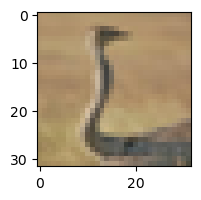

1/1 [==============================] - 0s 123ms/step
예측값:  Bird


In [48]:
# 베스트 모델 로딩


# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


## ResNet50

normalized X:  (50000, 32, 32, 3) 0.0 1.0
normalized X:  (10000, 32, 32, 3) 0.0 1.0
X_train: (50000, 32, 32, 3) Y_train: (50000, 10)
X_test: (10000, 32, 32, 3) Y_test: (10000, 10)
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_10[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn 

                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 8, 8, 64)     36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 8, 8, 64)    256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 8, 8, 64)    0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 8, 8, 256)    16640       ['conv2_block3_2_relu[0][0]']    
          

                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 4, 4, 128)    147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 4, 4, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 4, 4, 512)    66048       ['conv3_block3_2_relu[0][0]']    
          

                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 2, 2, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 2, 2, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
          

                                                                                                  
 conv4_block5_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 2, 2, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 2, 2, 1024)   0           ['conv4_block4_out[0][0]',       
          

                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 1, 1, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 1, 1, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 1, 1, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 1, 1, 2048)   0           ['conv5_block1_out[0][0]',       
          

Training:   0%|                                                                                               …

Epoch 1/30
625/625 [==============================] - 33s 46ms/step - loss: 1.9618 - accuracy: 0.3644 - val_loss: 2.8919 - val_accuracy: 0.3415
Epoch 2/30
625/625 [==============================] - 27s 43ms/step - loss: 1.8389 - accuracy: 0.4171 - val_loss: 2.6806 - val_accuracy: 0.1772
Epoch 3/30
625/625 [==============================] - 26s 42ms/step - loss: 1.9590 - accuracy: 0.4034 - val_loss: 88.2316 - val_accuracy: 0.2290
Epoch 4/30
625/625 [==============================] - 27s 43ms/step - loss: 1.7661 - accuracy: 0.4460 - val_loss: 2.3953 - val_accuracy: 0.2727
Epoch 5/30
625/625 [==============================] - 26s 42ms/step - loss: 1.7799 - accuracy: 0.4304 - val_loss: 2.5722 - val_accuracy: 0.4307
Epoch 6/30
625/625 [==============================] - 27s 44ms/step - loss: 1.6232 - accuracy: 0.4820 - val_loss: 1.6604 - val_accuracy: 0.4239
Epoch 7/30
625/625 [==============================] - 27s 43ms/step - loss: 1.5596 - accuracy: 0.5090 - val_loss: 2.5212 - val_accuracy

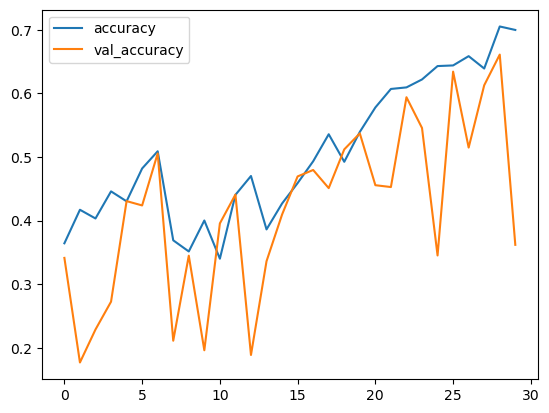

313/313 [==============================] - 3s 10ms/step - loss: 1.8570 - accuracy: 0.3635

Test Confusion Maxtrix: 
313/313 [==============================] - 4s 9ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,667,17,153,11,5,7,3,12,29,96
1,203,355,50,18,3,9,8,23,19,312
2,152,4,654,58,10,34,22,26,1,39
3,115,10,338,263,5,98,18,57,11,85
4,114,4,563,50,72,43,49,70,6,29
5,90,3,310,176,1,272,8,81,8,51
6,64,15,422,81,11,42,250,30,4,81
7,90,1,362,59,8,77,3,349,4,47
8,407,27,38,11,2,6,3,30,144,332


In [49]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 30
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','ColorObject_MNIST_ResNet50.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축


# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

목표값: 


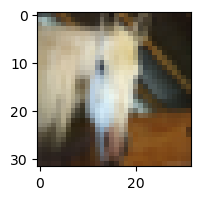

1/1 [==============================] - 1s 802ms/step
예측값:  Dog


In [50]:
# 베스트 모델 로딩


# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


# **Problem:** 보스턴 집값 예측

|   **변수**  |              **설명**              |
|:-------:|:------------------------------:|
|  **Price**  |            주택 가격           |
|   **CRIM**  |        1인당 범죄 발생률       |
|    **ZN**   |       주택용 토지의 비율       |
|  **INDUS**  |      비소매 상업지역 비율      |
|   **CHAS**  |    찰스강 인접 여부(인접=1)    |
|   **NOX**   |         일산화질소 농도        |
|    **RM**   |            방의 개수           |
|   **AGE**   | 1940년 이전에 건축된 주택 비율 |
|   **DIS**   |     주요 5대 회사와의 거리     |
|   **RAD**   |         고속도로 접근성        |
|   **TAX**   |             재산세             |
| **PTRATIO** |       교사와 학생의 비율       |
|    **B**    |         흑인 거주 비율         |
|  **LSTAT**  |          저소득층 비율         |

## MLP

(404, 13) (404, 1)
(102, 13) (102, 1)
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 18)]              0         
                                                                 
 dense_19 (Dense)            (None, 256)               4864      
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)

Training:   0%|                                                                                               …

Epoch 39: early stopping


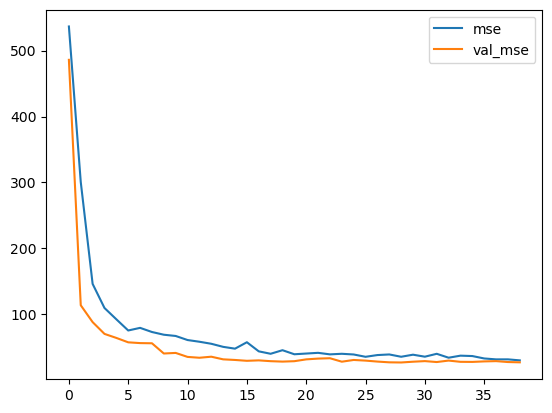

4/4 [==============================] - 0s 2ms/step


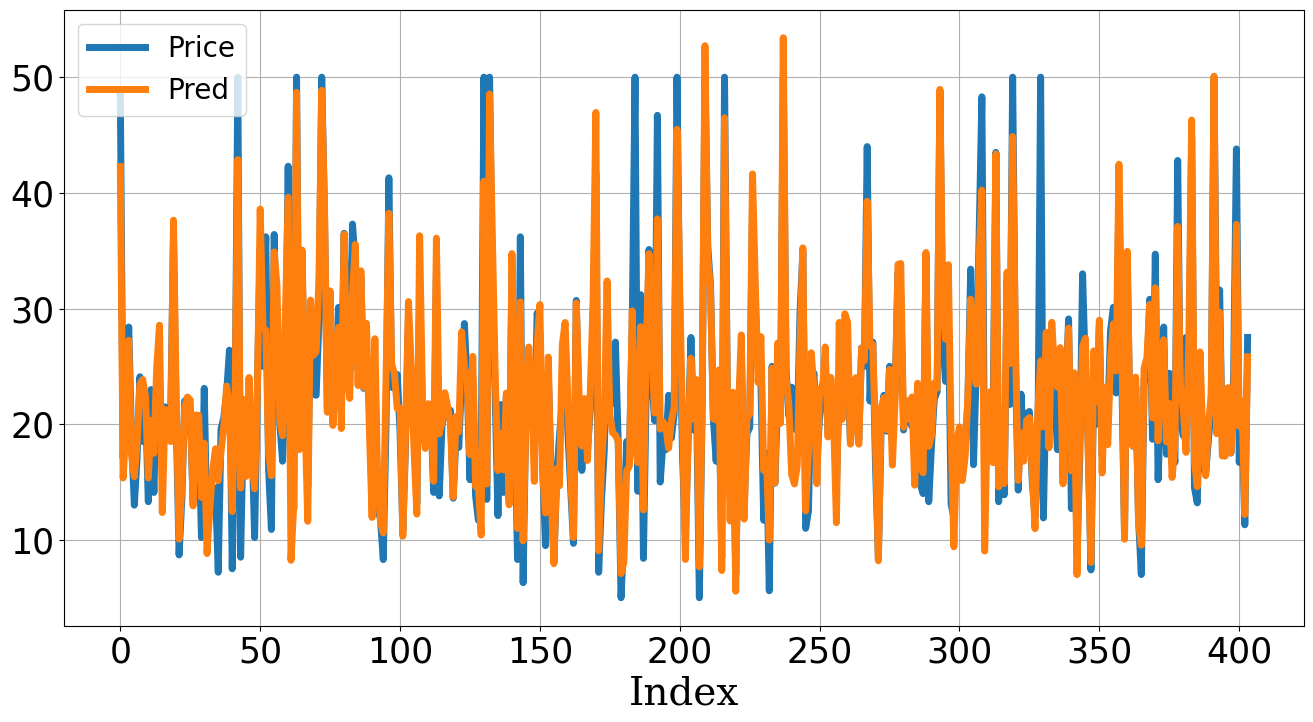

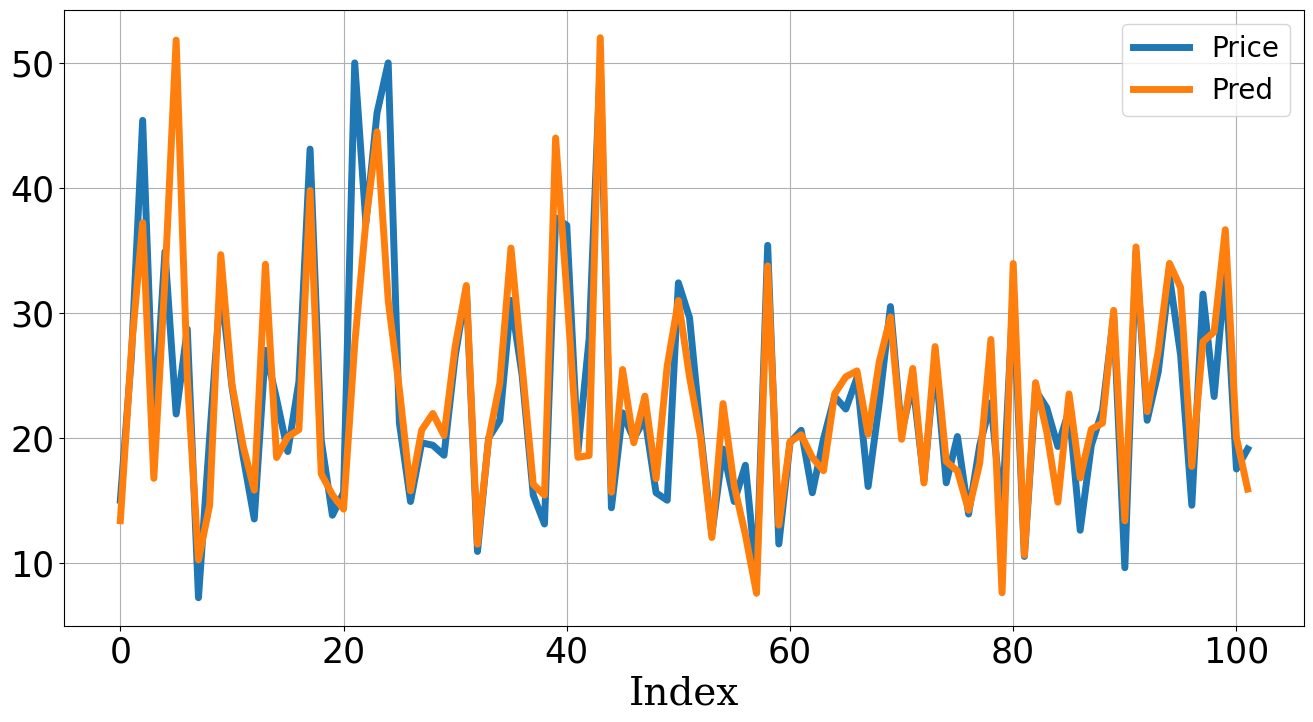

,MAE,MSE,MAPE
Train,2.34,12.39,0.12
Test,3.02,27.08,0.14


In [51]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'mse'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','BostonHousing_MLP.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      validation_data=(X_test_fes, Y_test),
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

4/4 [==============================] - 0s 2ms/step


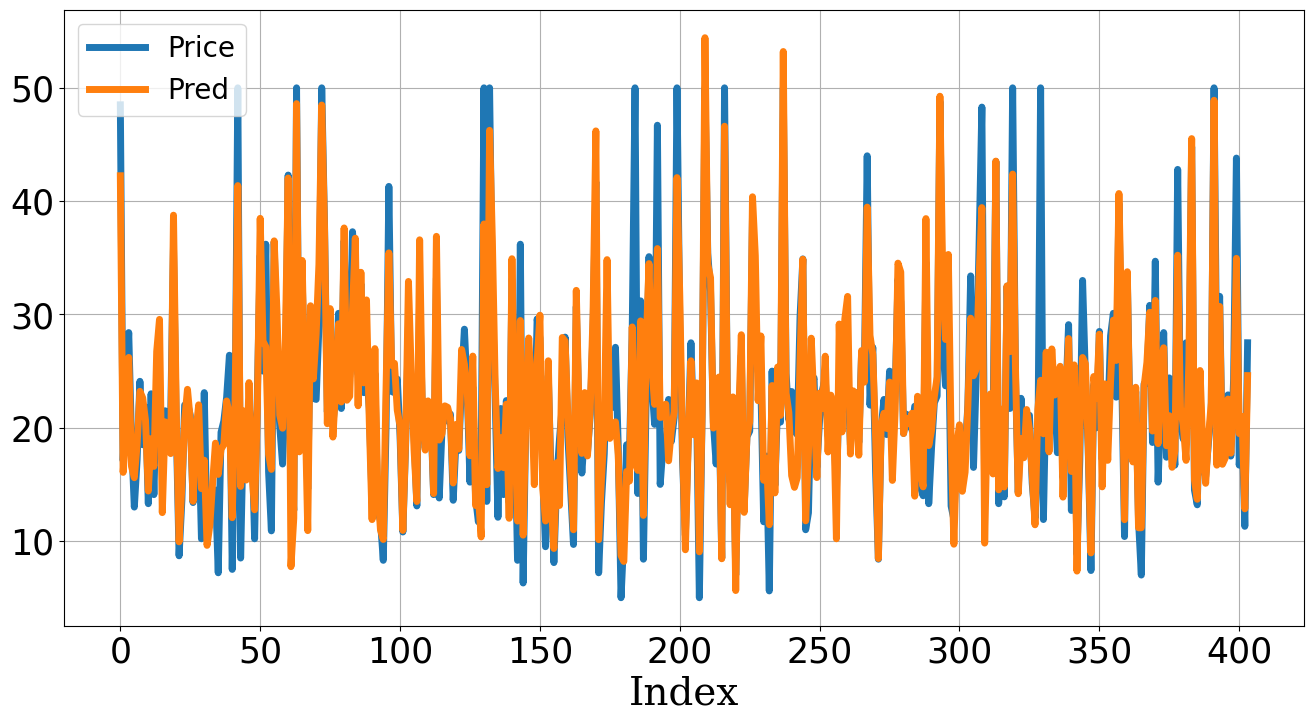

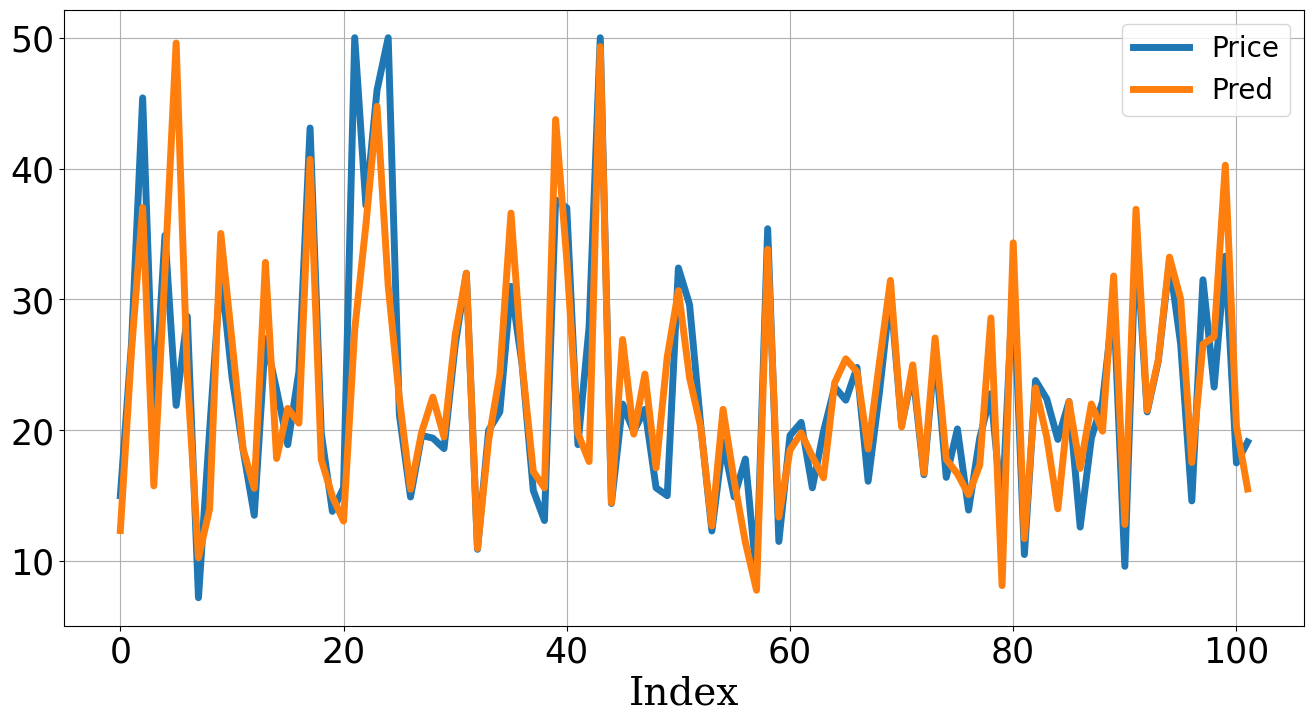

,MAE,MSE,MAPE
Train,2.52,14.67,0.13
Test,3.14,26.85,0.14


In [52]:
# 베스트 모델 로딩
model = load_model(FILENAME)

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

## CNN

<center><img src='Image/Expert/Conv1D2D3D.PNG' width='800'>(https://i.stack.imgur.com/)</center>

(404, 13) (404, 1)
(102, 13) (102, 1)
X_train: (404, 18, 1) Y_train: (404, 1)
X_test: (102, 18, 1) Y_test: (102, 1)
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 18, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 18, 128)           512       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 128)           0         
 )                                                               
                                                                 
 dropout_13 (Dropout)        (None, 9, 128)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 64)             24640     
                                                                 
 max_pool

Training:   0%|                                                                                               …

Epoch 128: early stopping


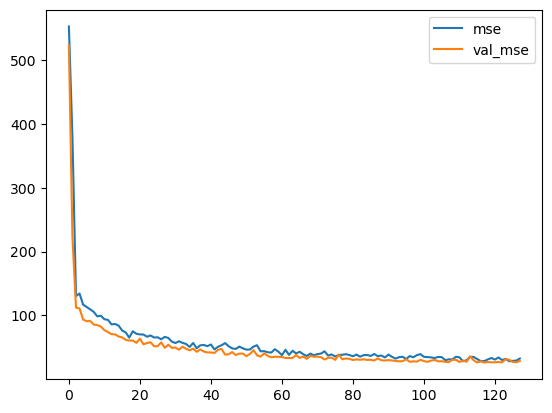

4/4 [==============================] - 0s 2ms/step


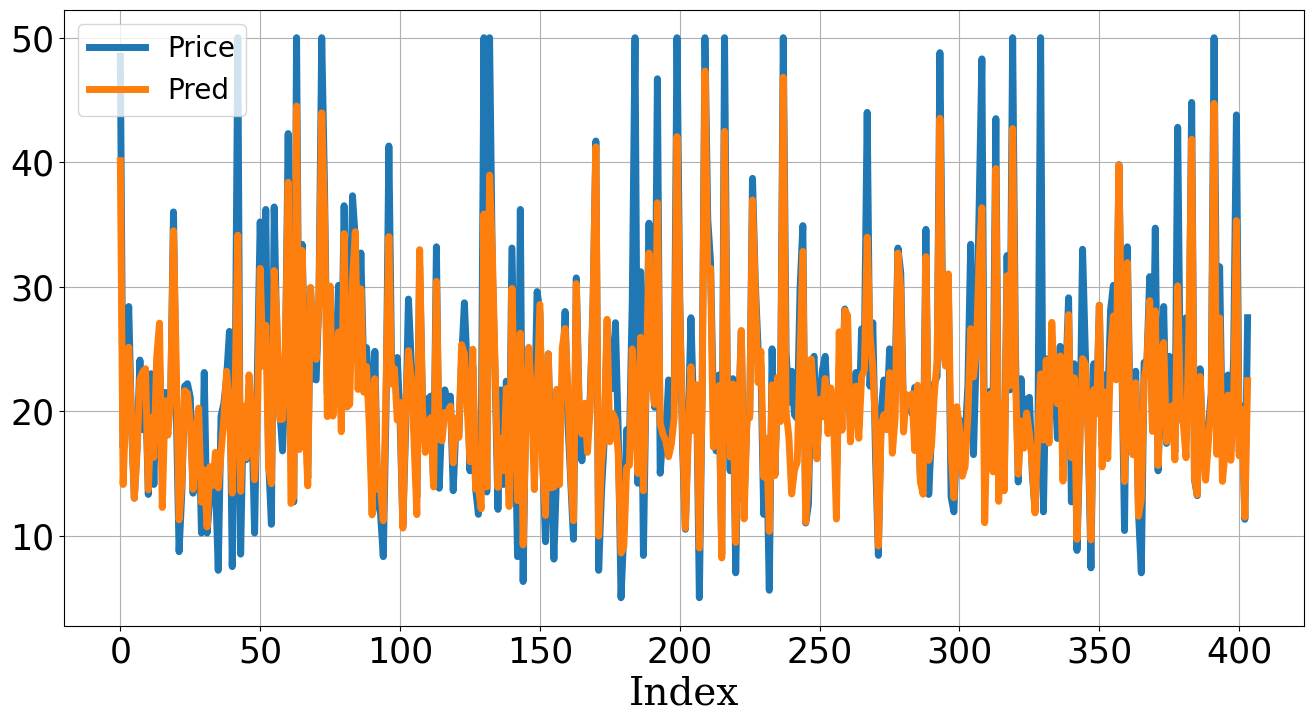

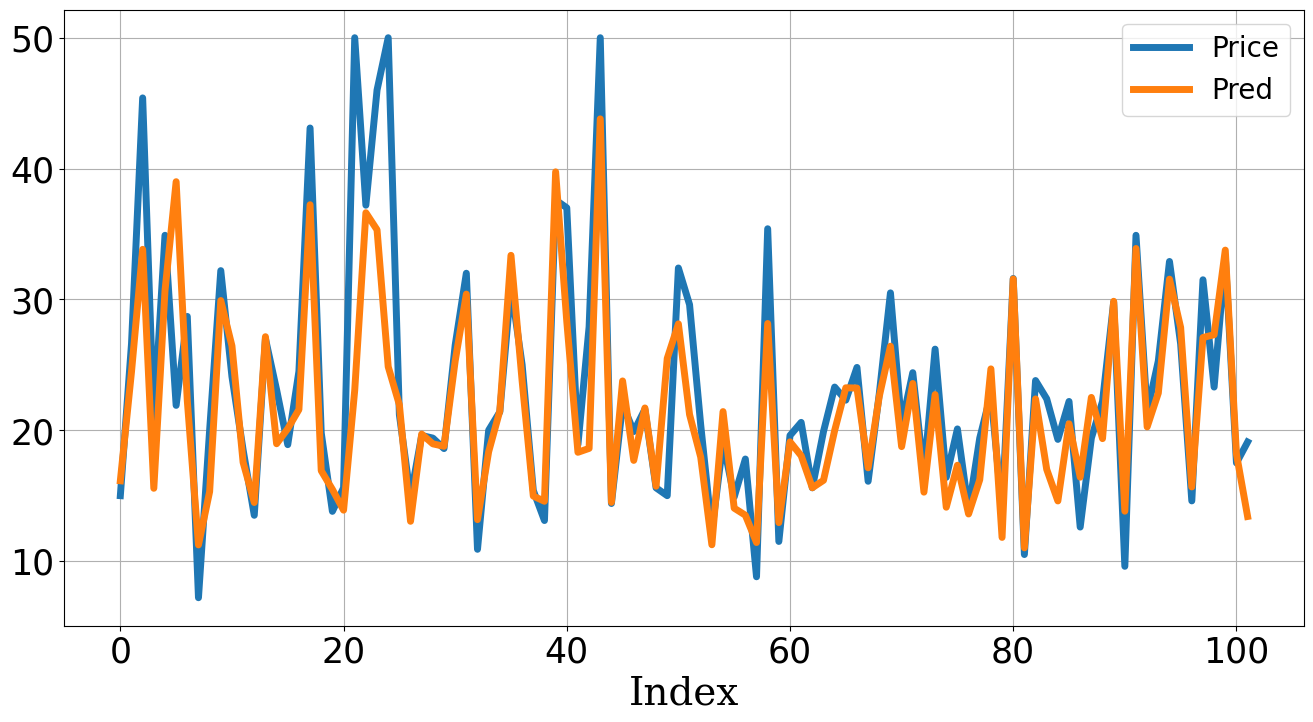

,MAE,MSE,MAPE
Train,2.50,15.49,0.12
Test,3.22,28.80,0.14


In [53]:
# 하이퍼파라미터


# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Reshape


# 네트워크 구축


## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, 
                      validation_data=(X_test, Y_test),
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

4/4 [==============================] - 0s 2ms/step


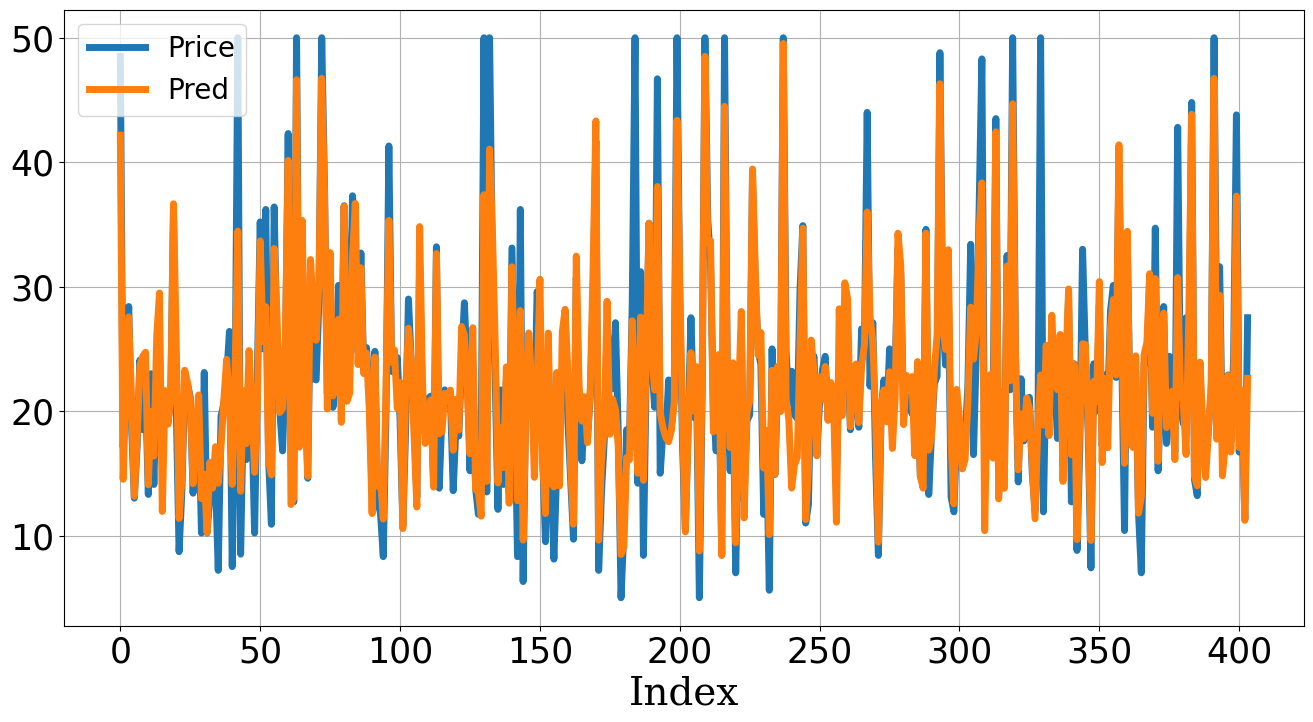

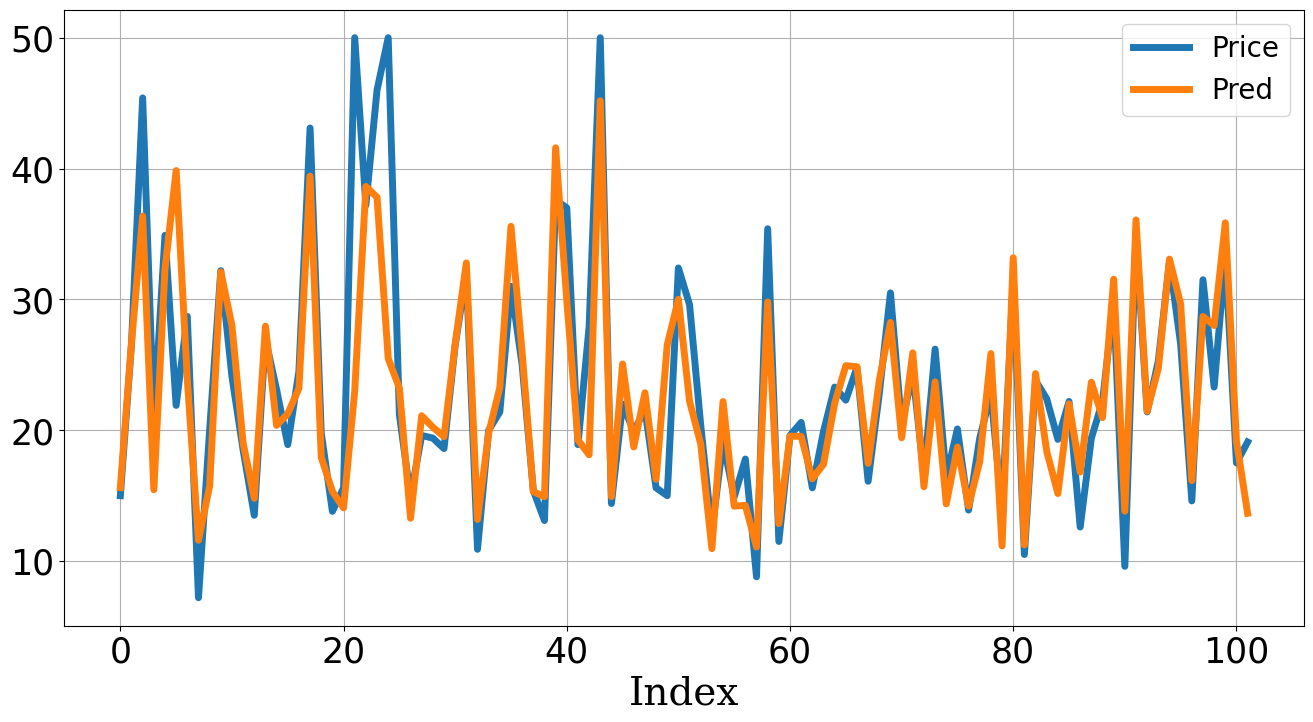

,MAE,MSE,MAPE
Train,2.38,13.98,0.12
Test,3.00,26.39,0.13


In [54]:
# 베스트 모델 로딩
model = load_model(FILENAME)

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)